In [55]:
import random
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Hoeffdin

In [34]:
class FairCoin(object):
    
    def __init__(self):
        self.n_heads = 0
        self.n_flips = 0
        
    def flip(self):
        return random.random() > 0.5
    
    def flip_n_ind_times(self, n):
        for i in xrange(n):
            self.n_heads += self.flip()
            self.n_flips += 1
            self._update_mu()
            
    def _update_mu(self):
        self.mu = 1.* self.n_heads / self.n_flips

In [35]:
def run_experiment(n=1000):
    coins = dict()
    cur_mu = 1
    cur_i = 0
    for i in xrange(1, n + 1):
        coin = FairCoin()
        coin.flip_n_ind_times(10)
        if coin.mu < cur_mu:
            cur_mu = coin.mu
            cur_i = i
        coins[i] = coin
    
    rand_i = random.randint(1, 1000)
    return coins[1].mu, coins[rand_i].mu, cur_mu

In [85]:
def run_n_experiments(n=10000):
    v1_lst = np.zeros(n)
    v_rand_lst = np.zeros(n)
    v_min_lst = np.zeros(n)
    for i in xrange(n):
        v1, v_rand, v_min = run_experiment(1000)
        v1_lst[i] = v1
        v_rand_lst[i] = v_rand
        v_min_lst[i] = v_min
    return v1_lst, v_rand_lst, v_min_lst

In [86]:
v1, v_rand, v_min = run_n_experiments()

In [87]:
def plot_dist(lst, label=None):
    plt.hist(lst)
    plt.xlim(0, 1)
    if label:
        plt.title(label)
    
    plt.show()

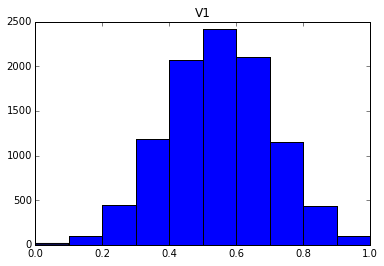

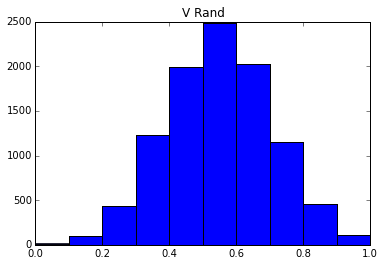

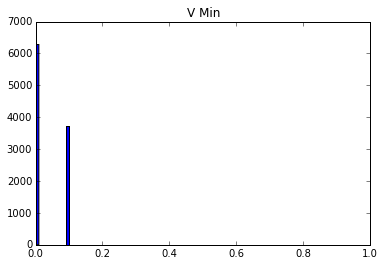

In [88]:
plot_dist(v1, 'V1')
plot_dist(v_rand, 'V Rand')
plot_dist(v_min, 'V Min')

In [105]:
def calc_p_error(v_array, epsilon):
    return 1. * sum(abs(v_array - 0.5) > epsilon) / len(v_array)

def calc_Hoeffdin(v_array, epsilon):
    return 2 * np.exp(-2*(epsilon**2)*10)

def plot_Hoeffdin(v_array, epsilon_lst):
    Hoeffdins = []
    for e in epsilon_lst:
        Hoeffdins.append(calc_Hoeffdin(v_array, e))
    plt.plot(epsilon_lst, Hoeffdins, label='Hoeffdin', alpha=0.5)

def plot_p(v_array, epsilon_lst, label='P Error'):
    p_errors = []
    for e in epsilon_lst:
        p_errors.append(calc_p_error(v_array, e))
    plt.plot(epsilon_lst, p_errors, label=label, alpha=0.5)

In [106]:
plot_p_error(v1, 0.4)

0.0021

In [107]:
calc_Hoeffdin(v1, 0.2)

0.89865792823444302

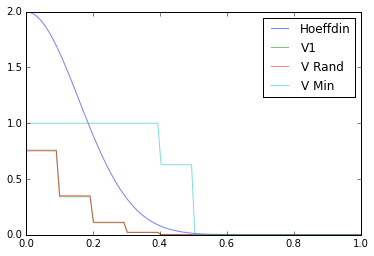

In [110]:
plot_Hoeffdin(v1, np.linspace(0, 1, 100))
plot_p(v1, np.linspace(0, 1, 100), label='V1')
plot_p(v_rand, np.linspace(0, 1, 100), label='V Rand')
plot_p(v_min, np.linspace(0, 1, 100), label='V Min')
plt.legend()

### V1 and V Rand obeys the Hoeffdin boundary, since the sampled V is reasonably random.  V Min does not obey the boundary since it is always the sample with the lowest of ratio of heads.  As a result, v is always far from u, increasing the likelihood of unacceptable error.

### If we look at V1, V Rand, and V Min as a different hypothesis trying to estimate the target function, we can see that there are hypothesis that does not obey the Hoeffdin boundary.  However, if we just constantly try new hypothesis in a set of all possible hypothesis, we will eventually find a hypothesis that holds despite already violating the boundary.